Data hosted on:
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/YP1PH1


Discovered through:
https://wjmh.org/search.php?where=aview&id=10.5534/wjmh.200066&code=2074WJMH&vmode=AONLY


<hr>
World J Mens Health. 2021 Oct;39(4):697-704. English. <br>
Published online Sep 17, 2020.<br>
https://doi.org/10.5534/wjmh.200066<br>
Copyright © 2021 Korean Society for Sexual Medicine and Andrology<br>

Original Article<br>
Cross Sectional Study among Intraocular Pressure, Mean Arterial Blood Pressure, and Serum Testosterone according to the Anthropometric Obesity Indices in Korean Men<br>
Jong Soo Lee,1 Min Ho Lee,2 Jae Hyun Kim,1 Yeon Ji Jo,1 Jong Hun Shin,3 and Hyun Jun Park4
<hr>

1. SVM

2. KNN

3. Ensembles<br>
i. Random Forest<br>
ii. LightGBM<br>
iii. XGBoost<br>
iv. CatBoost

4. Voting Classifier

In [136]:
import pandas as pd
import os
import numpy as np
import time

In [137]:
# display all cols without abbreviations
pd.set_option('display.max_columns', None)


In [138]:
os.listdir()

['.ipynb_checkpoints',
 'catboost_info',
 'Cross_Sectional_Study_among_Intraocular_Pressure_M.pdf',
 'grid_CatBoost.pkl',
 'grid_KNN.pkl',
 'grid_LGBM.pkl',
 'grid_RF.pkl',
 'grid_SVM.pkl',
 'grid_XGBoost.pkl',
 'mean serum TT levels that i used for the cw.png',
 'metrics table template.docx',
 'ML CW.ipynb',
 'ML_CW_PAPER_in_progress.docx',
 'Sample_1.docx',
 'Sample_1.pdf',
 'Sample_1.xlsx',
 'serum TT (40s to 70s).gif',
 'TESTING FOR CW - DATA 2 - 7072CEM .ipynb',
 'testosterone_trimmed_data.xlsx',
 'voting_classifier.pkl',
 '~$_CW_PAPER_in_progress.docx',
 '~WRL0005.tmp']

# Data Preprocessing

In [5]:
df_orig = pd.read_excel('testosterone_trimmed_data.xlsx')

In [6]:
df_orig

,ID,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Testosterone,Modified broca's index,BMI,ABSI,WtHR
0,1,65,170.1,76.8,91.5,92.666667,124,77.0,17.5,16,19,3.15,121.73,26.54,0.79,0.54
1,2,61,175.3,71.4,85.0,115.333333,148,99.0,13.0,13,13,5.44,105.36,23.23,0.79,0.48
2,3,57,174.8,70.7,88.0,91.333333,122,76.0,16.0,16,16,3.93,105.02,23.14,0.82,0.50
3,4,70,171.4,64.2,87.0,93.000000,125,77.0,10.5,10,11,5.73,99.91,21.85,0.85,0.51
4,5,49,185.7,83.1,89.0,81.666667,107,69.0,12.5,12,13,6.69,107.74,24.10,0.78,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,4036,73,161.3,56.5,82.5,87.333333,132,65.0,11.5,13,10,4.12,102.41,21.72,0.83,0.51
3945,4037,56,183.9,89.6,94.0,106.666667,134,93.0,16.5,15,18,2.30,118.66,26.49,0.78,0.51
3946,4038,76,167.6,76.6,95.0,93.000000,131,74.0,11.5,12,11,2.85,125.90,27.27,0.81,0.57
3947,4039,54,187.2,90.5,101.0,74.333333,103,60.0,14.0,14,14,4.63,115.32,25.82,0.84,0.54


In [7]:
nan_rows = df_orig[df_orig.isna().any(axis=1)]

print("DataFrame with rows containing NaN values:")
nan_rows

DataFrame with rows containing NaN values:


,ID,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Testosterone,Modified broca's index,BMI,ABSI,WtHR
1501,1530,77,170.2,68.0,90.2,48.666667,146,NaN,15.0,14,16,3.12,107.63,23.47,0.84,0.53
3114,3186,53,183.1,82.5,92.0,44.666667,134,NaN,19.0,18,20,2.70,110.31,24.61,0.80,0.50


In [8]:
df = df_orig[~df_orig.isna().any(axis=1)]

print("DataFrame excluding NaN values:")
df

DataFrame excluding NaN values:


,ID,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Testosterone,Modified broca's index,BMI,ABSI,WtHR
0,1,65,170.1,76.8,91.5,92.666667,124,77.0,17.5,16,19,3.15,121.73,26.54,0.79,0.54
1,2,61,175.3,71.4,85.0,115.333333,148,99.0,13.0,13,13,5.44,105.36,23.23,0.79,0.48
2,3,57,174.8,70.7,88.0,91.333333,122,76.0,16.0,16,16,3.93,105.02,23.14,0.82,0.50
3,4,70,171.4,64.2,87.0,93.000000,125,77.0,10.5,10,11,5.73,99.91,21.85,0.85,0.51
4,5,49,185.7,83.1,89.0,81.666667,107,69.0,12.5,12,13,6.69,107.74,24.10,0.78,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,4036,73,161.3,56.5,82.5,87.333333,132,65.0,11.5,13,10,4.12,102.41,21.72,0.83,0.51
3945,4037,56,183.9,89.6,94.0,106.666667,134,93.0,16.5,15,18,2.30,118.66,26.49,0.78,0.51
3946,4038,76,167.6,76.6,95.0,93.000000,131,74.0,11.5,12,11,2.85,125.90,27.27,0.81,0.57
3947,4039,54,187.2,90.5,101.0,74.333333,103,60.0,14.0,14,14,4.63,115.32,25.82,0.84,0.54


In [9]:
df.drop(columns=['ID'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8756\1524064702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ID'], inplace=True)


In [10]:
df.head()

,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Testosterone,Modified broca's index,BMI,ABSI,WtHR
0,65,170.1,76.8,91.5,92.666667,124,77.0,17.5,16,19,3.15,121.73,26.54,0.79,0.54
1,61,175.3,71.4,85.0,115.333333,148,99.0,13.0,13,13,5.44,105.36,23.23,0.79,0.48
2,57,174.8,70.7,88.0,91.333333,122,76.0,16.0,16,16,3.93,105.02,23.14,0.82,0.50
3,70,171.4,64.2,87.0,93.000000,125,77.0,10.5,10,11,5.73,99.91,21.85,0.85,0.51
4,49,185.7,83.1,89.0,81.666667,107,69.0,12.5,12,13,6.69,107.74,24.10,0.78,0.48


In [11]:
df['Testosterone'].describe()

count    3947.000000
mean        4.213436
std         1.826486
min         0.000000
25%         2.850000
50%         4.020000
75%         5.250000
max        15.270000
Name: Testosterone, dtype: float64

<HR>


Now, the dataset table "data" contains the following variables: 

- Age (yrs)
- Height (cm)
- Weight (KG)
- Waist (cm)
- MAP (mmHg)
- SBP (Systolic Blood Pressure) (mmHg)
- DBP (Diastolic Blood Pressure) (mmHg)
- IOP_M (Intraocular Pressure Mean) (mmHg)
- IOP_R (Intraocular Pressure Right) (mmHg)
- IOP_L (Intraocular Pressure Left) (mmHg)
- Modified Broca's Index A.K.A. Obesity Index
- BMI (Body Mass Index) (kg/m**2)
- ABSI (A Body Shape Index)
- WtHR (Waist to Height Ratio)
- Testosterone (ng/mL)


<HR>

# - Binning column 'AGE' 

The process done in the provided code is called "binning" or "discretization." Binning involves grouping continuous numeric data into discrete intervals or bins. In this case, the 'Age' values in the DataFrame are being binned into age groups based on predefined bins and labels.

Here's a breakdown of the process:

Define Bins and Labels: First, you define the bins that represent the boundaries of each age group and the corresponding labels for those groups. In the code snippet, age_bins represents the boundaries of the age groups, and age_labels represents the labels assigned to each age group.

Binning: The pd.cut() function from the pandas library is used to bin the 'Age' values in the DataFrame into the specified age groups. The function takes the 'Age' column as input, along with the predefined bins and labels. It assigns each 'Age' value to the appropriate age group based on the defined bins and labels.

Display Result: Finally, the resulting DataFrame with the new 'Age_Group' column, containing the binned age groups, is displayed.

Overall, binning is a useful preprocessing technique, often used to simplify complex data, reduce noise, or prepare data for machine learning algorithms that require categorical inputs.

In [12]:
# HERE I AM CLASSIFYING AGE BINS INTO NEW DIFFERENT COLUMNS AND THEN ASSIGNING BINARY VALUES TO THESE COLUMNS

age_bins = [0, 30, 40, 50, 60, 70, float('inf')]  
age_labels = ['<30', '30s', '40s', '50s', '60s', '>=70']  

# Bin the 'Age' values into age groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

df

C:\Users\USER\AppData\Local\Temp\ipykernel_8756\1285892801.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Testosterone,Modified broca's index,BMI,ABSI,WtHR,Age_Group
0,65,170.1,76.8,91.5,92.666667,124,77.0,17.5,16,19,3.15,121.73,26.54,0.79,0.54,60s
1,61,175.3,71.4,85.0,115.333333,148,99.0,13.0,13,13,5.44,105.36,23.23,0.79,0.48,60s
2,57,174.8,70.7,88.0,91.333333,122,76.0,16.0,16,16,3.93,105.02,23.14,0.82,0.50,50s
3,70,171.4,64.2,87.0,93.000000,125,77.0,10.5,10,11,5.73,99.91,21.85,0.85,0.51,>=70
4,49,185.7,83.1,89.0,81.666667,107,69.0,12.5,12,13,6.69,107.74,24.10,0.78,0.48,40s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,73,161.3,56.5,82.5,87.333333,132,65.0,11.5,13,10,4.12,102.41,21.72,0.83,0.51,>=70
3945,56,183.9,89.6,94.0,106.666667,134,93.0,16.5,15,18,2.30,118.66,26.49,0.78,0.51,50s
3946,76,167.6,76.6,95.0,93.000000,131,74.0,11.5,12,11,2.85,125.90,27.27,0.81,0.57,>=70
3947,54,187.2,90.5,101.0,74.333333,103,60.0,14.0,14,14,4.63,115.32,25.82,0.84,0.54,50s


In [13]:
# as out reference values are in ng/dL and our df['Testosterone'] values are in ng/mL, we need to convert to a common unit
# we will use ng/dL as our unit for mean serum Testosterone levels

# to nanograms per deciliter (ng/dL), multiply the ng/mL value by 100


df['Testosterone'] = df['Testosterone']*100

C:\Users\USER\AppData\Local\Temp\ipykernel_8756\3937054566.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Testosterone'] = df['Testosterone']*100


In [14]:
# RE-ARRANGING COLUMNS SUCH THAT TARGET 'TESTOSTERONE' COLUMN IS AT THE END

columns = [col for col in df.columns if col != 'Testosterone']

columns.append('Testosterone')

# Reorder the columns in the DataFrame
df = df.reindex(columns=columns)


In [15]:
df

,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Modified broca's index,BMI,ABSI,WtHR,Age_Group,Testosterone
0,65,170.1,76.8,91.5,92.666667,124,77.0,17.5,16,19,121.73,26.54,0.79,0.54,60s,315.0
1,61,175.3,71.4,85.0,115.333333,148,99.0,13.0,13,13,105.36,23.23,0.79,0.48,60s,544.0
2,57,174.8,70.7,88.0,91.333333,122,76.0,16.0,16,16,105.02,23.14,0.82,0.50,50s,393.0
3,70,171.4,64.2,87.0,93.000000,125,77.0,10.5,10,11,99.91,21.85,0.85,0.51,>=70,573.0
4,49,185.7,83.1,89.0,81.666667,107,69.0,12.5,12,13,107.74,24.10,0.78,0.48,40s,669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,73,161.3,56.5,82.5,87.333333,132,65.0,11.5,13,10,102.41,21.72,0.83,0.51,>=70,412.0
3945,56,183.9,89.6,94.0,106.666667,134,93.0,16.5,15,18,118.66,26.49,0.78,0.51,50s,230.0
3946,76,167.6,76.6,95.0,93.000000,131,74.0,11.5,12,11,125.90,27.27,0.81,0.57,>=70,285.0
3947,54,187.2,90.5,101.0,74.333333,103,60.0,14.0,14,14,115.32,25.82,0.84,0.54,50s,463.0


In [16]:
# keep_groups = ['40s', '50s', '60s']

remove_groups = ['<30', '30s', '>=70']
df = df[~df['Age_Group'].isin(remove_groups)]

# Drop unused categories from the 'Age_Group' column
df['Age_Group'] = df['Age_Group'].cat.remove_unused_categories()

df

C:\Users\USER\AppData\Local\Temp\ipykernel_8756\3405765006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = df['Age_Group'].cat.remove_unused_categories()


,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Modified broca's index,BMI,ABSI,WtHR,Age_Group,Testosterone
0,65,170.1,76.8,91.5,92.666667,124,77.0,17.5,16,19,121.73,26.54,0.79,0.54,60s,315.0
1,61,175.3,71.4,85.0,115.333333,148,99.0,13.0,13,13,105.36,23.23,0.79,0.48,60s,544.0
2,57,174.8,70.7,88.0,91.333333,122,76.0,16.0,16,16,105.02,23.14,0.82,0.50,50s,393.0
4,49,185.7,83.1,89.0,81.666667,107,69.0,12.5,12,13,107.74,24.10,0.78,0.48,40s,669.0
5,51,178.4,83.6,95.0,100.000000,132,84.0,17.0,18,16,118.48,26.27,0.80,0.53,50s,363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,51,173.2,79.4,89.0,86.333333,125,67.0,14.0,14,14,120.52,26.47,0.76,0.51,50s,620.0
3942,67,162.4,53.8,71.0,96.666667,124,83.0,11.5,12,11,95.80,20.40,0.75,0.44,60s,124.0
3945,56,183.9,89.6,94.0,106.666667,134,93.0,16.5,15,18,118.66,26.49,0.78,0.51,50s,230.0
3947,54,187.2,90.5,101.0,74.333333,103,60.0,14.0,14,14,115.32,25.82,0.84,0.54,50s,463.0


In [17]:
aaa = ['detected unwanted age groups' for age in remove_groups if age in df['Age_Group']]
aaa

[]

In [18]:
del aaa

# DISCRETIZATION for testo (based on thresholds)

The process done in the provided code is called "reference-based classification" or "threshold-based classification." This process involves defining reference values for a specific attribute (in this case, testosterone levels) across different groups (in this case, age groups). These reference values are then used to classify new data points based on their similarity to the reference values.

Here's a breakdown of the process:

Define Reference Values: Reference values are defined for testosterone levels across different age groups. In the code snippet, reference means and standard deviations are provided for age groups '40s', '50s', and '60s'.

Create Reference DataFrame: A DataFrame (ref_df) is created to store the reference values for each age group.

Classification Function: A function (classify_testosterone) is defined to classify testosterone levels based on the age group and the provided reference values. The function calculates low and high thresholds based on the reference mean and standard deviation for the corresponding age group and then compares the testosterone level against these thresholds to determine the classification ('Low', 'Normal', or 'High').

Apply Classification: The classification function is applied to each row in the DataFrame (df) containing the testosterone levels. This is done using the apply function along the rows (axis=1), where the age group and testosterone level are passed as arguments to the classification function.

Overall, this process allows for the classification of testosterone levels into predefined categories based on reference values specific to different age groups.




<hr> Average serum TT in men across ages in Japanese men (n=1139):


500 +- 249 ng/dl for a man in his 40’s <BR>
512 +- 328 ng/dl for a man in his 50’s <BR>
499 +- 320 ng/dl for a man in his 60’s <BR>
~~545 +- 356 ng/dl for a man in his 70’s <BR>~~

    
Study published in 2005
    
SOURCE:
<BR>
https://onlinelibrary.wiley.com/doi/full/10.1111/j.1442-2042.2005.01143.x?saml_referrer

In [19]:
import pandas as pd

# Define reference values
age_groups = ['40s', '50s', '60s']
ref_mean = [500, 512, 499]
ref_std = [249, 328, 320]

# Create a DataFrame for reference values
ref_df = pd.DataFrame({'Age_Group': age_groups, 'Ref_Mean': ref_mean, 'Ref_Std': ref_std})

# Function to classify testosterone levels
def classify_testosterone(age_group, testosterone):
    ref_values = ref_df.loc[ref_df['Age_Group'] == age_group]
    ref_mean = ref_values['Ref_Mean'].values[0]
    ref_std = ref_values['Ref_Std'].values[0]

    low_threshold = ref_mean - ref_std
    high_threshold = ref_mean + ref_std

    if testosterone < low_threshold:
        return 'Low'
    elif low_threshold <= testosterone <= high_threshold:
        return 'Normal'
    else:
        return 'High'

# Apply classification to each row
df['Testosterone_Class'] = df.apply(lambda row: classify_testosterone(row['Age_Group'], row['Testosterone']), axis=1)


C:\Users\USER\AppData\Local\Temp\ipykernel_8756\2910800553.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Testosterone_Class'] = df.apply(lambda row: classify_testosterone(row['Age_Group'], row['Testosterone']), axis=1)


In [20]:
df

,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Modified broca's index,BMI,ABSI,WtHR,Age_Group,Testosterone,Testosterone_Class
0,65,170.1,76.8,91.5,92.666667,124,77.0,17.5,16,19,121.73,26.54,0.79,0.54,60s,315.0,Normal
1,61,175.3,71.4,85.0,115.333333,148,99.0,13.0,13,13,105.36,23.23,0.79,0.48,60s,544.0,Normal
2,57,174.8,70.7,88.0,91.333333,122,76.0,16.0,16,16,105.02,23.14,0.82,0.50,50s,393.0,Normal
4,49,185.7,83.1,89.0,81.666667,107,69.0,12.5,12,13,107.74,24.10,0.78,0.48,40s,669.0,Normal
5,51,178.4,83.6,95.0,100.000000,132,84.0,17.0,18,16,118.48,26.27,0.80,0.53,50s,363.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,51,173.2,79.4,89.0,86.333333,125,67.0,14.0,14,14,120.52,26.47,0.76,0.51,50s,620.0,Normal
3942,67,162.4,53.8,71.0,96.666667,124,83.0,11.5,12,11,95.80,20.40,0.75,0.44,60s,124.0,Low
3945,56,183.9,89.6,94.0,106.666667,134,93.0,16.5,15,18,118.66,26.49,0.78,0.51,50s,230.0,Normal
3947,54,187.2,90.5,101.0,74.333333,103,60.0,14.0,14,14,115.32,25.82,0.84,0.54,50s,463.0,Normal


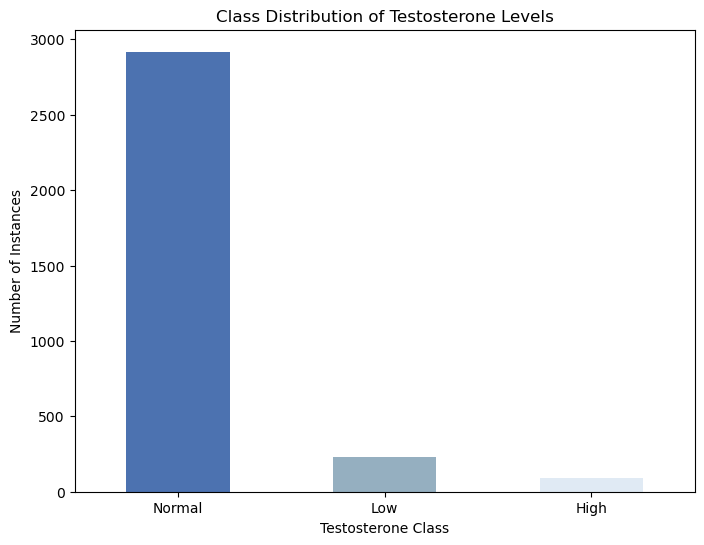

Class Imbalance Ratio:
Testosterone_Class
Normal    89.950678
Low        7.182491
High       2.866831
Name: count, dtype: float64


In [21]:
import matplotlib.pyplot as plt

# Calculate class distribution
class_distribution = df['Testosterone_Class'].value_counts()

# Plot class distribution
plt.figure(figsize=(8, 6))


# shades of blue from darkest to lightest
# colors = ['#4c72b0', '#6f8ab7', '#95afc0', '#b8cfe5', '#c9d9ec', '#e0eaf4']

class_distribution.plot(kind='bar', color=['#4c72b0', '#95afc0', '#e0eaf4'])
plt.title('Class Distribution of Testosterone Levels')
plt.xlabel('Testosterone Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

# Calculate class imbalance ratio
total_instances = len(df)
class_imbalance_ratio = (class_distribution / total_instances)*100
print("Class Imbalance Ratio:")
print(class_imbalance_ratio)


# testing if SMOTE-NC will work with age groups dummied into Booleans

In [58]:
import pandas as pd


# get_dummies to create dummy variables for Age_Group
age_group_dummies = pd.get_dummies(df['Age_Group'])

df_bool_age = pd.concat([df, age_group_dummies], axis=1)

df_bool_age

,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Modified broca's index,BMI,ABSI,WtHR,Age_Group,Testosterone,Testosterone_Class,40s,50s,60s
0,65,170.1,76.8,91.5,92.666667,124,77.0,17.5,16,19,121.73,26.54,0.79,0.54,60s,315.0,Normal,False,False,True
1,61,175.3,71.4,85.0,115.333333,148,99.0,13.0,13,13,105.36,23.23,0.79,0.48,60s,544.0,Normal,False,False,True
2,57,174.8,70.7,88.0,91.333333,122,76.0,16.0,16,16,105.02,23.14,0.82,0.50,50s,393.0,Normal,False,True,False
4,49,185.7,83.1,89.0,81.666667,107,69.0,12.5,12,13,107.74,24.10,0.78,0.48,40s,669.0,Normal,True,False,False
5,51,178.4,83.6,95.0,100.000000,132,84.0,17.0,18,16,118.48,26.27,0.80,0.53,50s,363.0,Normal,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,51,173.2,79.4,89.0,86.333333,125,67.0,14.0,14,14,120.52,26.47,0.76,0.51,50s,620.0,Normal,False,True,False
3942,67,162.4,53.8,71.0,96.666667,124,83.0,11.5,12,11,95.80,20.40,0.75,0.44,60s,124.0,Low,False,False,True
3945,56,183.9,89.6,94.0,106.666667,134,93.0,16.5,15,18,118.66,26.49,0.78,0.51,50s,230.0,Normal,False,True,False
3947,54,187.2,90.5,101.0,74.333333,103,60.0,14.0,14,14,115.32,25.82,0.84,0.54,50s,463.0,Normal,False,True,False


In [26]:
# RE-ARRANGING COLUMNS SUCH THAT TARGET 'TESTOSTERONE' COLUMN IS AT THE END

# Get the list of column names excluding 'Testosterone'
columns = [col for col in df_bool_age.columns if col != 'Testosterone_Class']

columns.append('Testosterone_Class')

df_bool_age = df_bool_age.reindex(columns=columns)

In [27]:
df_bool_age

,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Modified broca's index,BMI,ABSI,WtHR,Age_Group,Testosterone,40s,50s,60s,Testosterone_Class
0,65,170.1,76.8,91.5,92.666667,124,77.0,17.5,16,19,121.73,26.54,0.79,0.54,60s,315.0,False,False,True,Normal
1,61,175.3,71.4,85.0,115.333333,148,99.0,13.0,13,13,105.36,23.23,0.79,0.48,60s,544.0,False,False,True,Normal
2,57,174.8,70.7,88.0,91.333333,122,76.0,16.0,16,16,105.02,23.14,0.82,0.50,50s,393.0,False,True,False,Normal
4,49,185.7,83.1,89.0,81.666667,107,69.0,12.5,12,13,107.74,24.10,0.78,0.48,40s,669.0,True,False,False,Normal
5,51,178.4,83.6,95.0,100.000000,132,84.0,17.0,18,16,118.48,26.27,0.80,0.53,50s,363.0,False,True,False,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,51,173.2,79.4,89.0,86.333333,125,67.0,14.0,14,14,120.52,26.47,0.76,0.51,50s,620.0,False,True,False,Normal
3942,67,162.4,53.8,71.0,96.666667,124,83.0,11.5,12,11,95.80,20.40,0.75,0.44,60s,124.0,False,False,True,Low
3945,56,183.9,89.6,94.0,106.666667,134,93.0,16.5,15,18,118.66,26.49,0.78,0.51,50s,230.0,False,True,False,Normal
3947,54,187.2,90.5,101.0,74.333333,103,60.0,14.0,14,14,115.32,25.82,0.84,0.54,50s,463.0,False,True,False,Normal


In [28]:
df_bool_age = df_bool_age.drop(columns=['Age_Group', 'Testosterone'])

In [29]:
df_bool_age.head()

,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Modified broca's index,BMI,ABSI,WtHR,40s,50s,60s,Testosterone_Class
0,65,170.1,76.8,91.5,92.666667,124,77.0,17.5,16,19,121.73,26.54,0.79,0.54,False,False,True,Normal
1,61,175.3,71.4,85.0,115.333333,148,99.0,13.0,13,13,105.36,23.23,0.79,0.48,False,False,True,Normal
2,57,174.8,70.7,88.0,91.333333,122,76.0,16.0,16,16,105.02,23.14,0.82,0.50,False,True,False,Normal
4,49,185.7,83.1,89.0,81.666667,107,69.0,12.5,12,13,107.74,24.10,0.78,0.48,True,False,False,Normal
5,51,178.4,83.6,95.0,100.000000,132,84.0,17.0,18,16,118.48,26.27,0.80,0.53,False,True,False,Normal


In [30]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# features and target variable
X = df_bool_age.drop(columns=['Testosterone_Class'])
y = df_bool_age['Testosterone_Class']

#  categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#  categorical features indices
categorical_features_indices = [X.columns.get_loc(col) for col in ['40s', '50s', '60s']]

# SMOTE-NC
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=96)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# numerical target variable back to categorical
y_resampled = le.inverse_transform(y_resampled)

# new df with resampled data
resampled_df_bool_age = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df_bool_age['Testosterone_Class'] = y_resampled

In [31]:
resampled_df_bool_age

,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Modified broca's index,BMI,ABSI,WtHR,40s,50s,60s,Testosterone_Class
0,65,170.100000,76.800000,91.500000,92.666667,124,77.000000,17.500000,16,19,121.730000,26.540000,0.790000,0.540000,False,False,True,Normal
1,61,175.300000,71.400000,85.000000,115.333333,148,99.000000,13.000000,13,13,105.360000,23.230000,0.790000,0.480000,False,False,True,Normal
2,57,174.800000,70.700000,88.000000,91.333333,122,76.000000,16.000000,16,16,105.020000,23.140000,0.820000,0.500000,False,True,False,Normal
3,49,185.700000,83.100000,89.000000,81.666667,107,69.000000,12.500000,12,13,107.740000,24.100000,0.780000,0.480000,True,False,False,Normal
4,51,178.400000,83.600000,95.000000,100.000000,132,84.000000,17.000000,18,16,118.480000,26.270000,0.800000,0.530000,False,True,False,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8749,55,172.697281,74.262538,88.930514,112.634440,149,94.138972,14.895771,14,14,113.504411,24.903051,0.789305,0.519305,False,True,False,Low
8750,48,176.401395,76.463319,88.000000,106.605609,139,90.098558,18.598558,20,16,111.131761,24.559702,0.782817,0.500000,True,False,False,Low
8751,47,168.594873,75.355222,95.386846,91.795615,117,78.924564,14.115570,13,15,122.170088,26.513530,0.823868,0.564623,True,False,False,Low
8752,57,176.781378,64.095160,77.882689,70.349468,96,57.186218,12.593109,13,12,92.754397,20.508548,0.780689,0.442551,False,False,False,Low


In [32]:
resampled_df_bool_age['Testosterone_Class'].value_counts()

Testosterone_Class
Normal    2918
High      2918
Low       2918
Name: count, dtype: int64

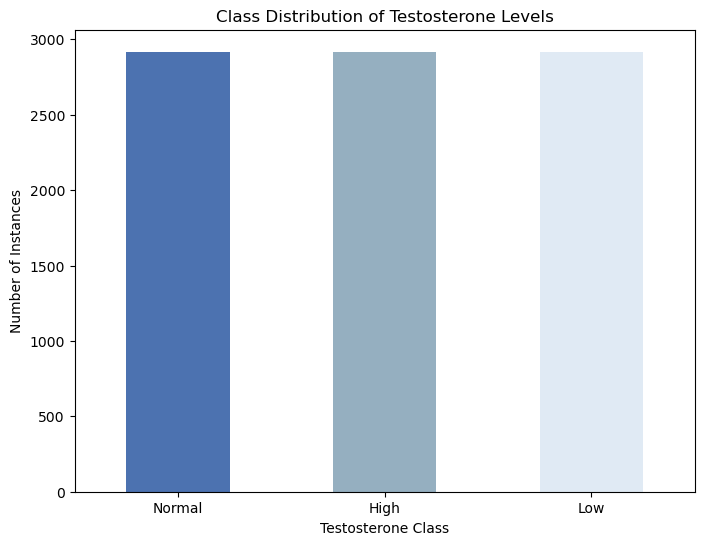

Class Imbalance Ratio:
Testosterone_Class
Normal    33.333333
High      33.333333
Low       33.333333
Name: count, dtype: float64


In [33]:
import matplotlib.pyplot as plt

# class distribution
smote_nc_class_dist = resampled_df_bool_age['Testosterone_Class'].value_counts()

# plotting class distribution
plt.figure(figsize=(8, 6))


# shades of blue from darkest to lightest
# colors = ['#4c72b0', '#6f8ab7', '#95afc0', '#b8cfe5', '#c9d9ec', '#e0eaf4']

smote_nc_class_dist.plot(kind='bar', color=['#4c72b0', '#95afc0', '#e0eaf4'])
plt.title('Class Distribution of Testosterone Levels')
plt.xlabel('Testosterone Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

# class imbalance ratio
total_instances = len(resampled_df_bool_age)
class_imbalance_ratio = (smote_nc_class_dist / total_instances)*100
print("Class Imbalance Ratio:")
print(class_imbalance_ratio)


### Now we shall go forward as our target classes are balanced

# - PCA

* The choice of the percentage of variance to retain in principal component analysis (PCA) depends on various factors including the specific goals of the analysis, the complexity of the data, and computational constraints. Here are some common percentages used and their implications:


* 95% Variance Explained: Retaining principal components that explain at least 95% of the variance is a commonly used threshold. This is often considered a good balance between capturing a significant portion of the variance while still reducing the dimensionality of the data.


* 90% Variance Explained: Similarly, retaining principal components that explain at least 90% of the variance is also frequently used. This is a slightly less stringent criterion compared to 95% and may be chosen when a slightly lower dimensionality reduction is acceptable.


* 99% Variance Explained: In some cases where a very high level of detail is required or when the data is highly complex, retaining principal components that explain at least 99% of the variance may be chosen. This ensures that almost all of the variance in the data is captured but may result in a larger number of retained components.

In [34]:
resampled_df_bool_age.head()

,Age,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Modified broca's index,BMI,ABSI,WtHR,40s,50s,60s,Testosterone_Class
0,65,170.1,76.8,91.5,92.666667,124,77.0,17.5,16,19,121.73,26.54,0.79,0.54,False,False,True,Normal
1,61,175.3,71.4,85.0,115.333333,148,99.0,13.0,13,13,105.36,23.23,0.79,0.48,False,False,True,Normal
2,57,174.8,70.7,88.0,91.333333,122,76.0,16.0,16,16,105.02,23.14,0.82,0.50,False,True,False,Normal
3,49,185.7,83.1,89.0,81.666667,107,69.0,12.5,12,13,107.74,24.10,0.78,0.48,True,False,False,Normal
4,51,178.4,83.6,95.0,100.000000,132,84.0,17.0,18,16,118.48,26.27,0.80,0.53,False,True,False,Normal


In [35]:
resampled_df_bool_age = resampled_df_bool_age.drop(columns=['Age'])


In [36]:
resampled_df_bool_age.head()

,Height,Weight,Waist,MAP,SBP,DBP,IOP_M,IOP_R,IOP_L,Modified broca's index,BMI,ABSI,WtHR,40s,50s,60s,Testosterone_Class
0,170.1,76.8,91.5,92.666667,124,77.0,17.5,16,19,121.73,26.54,0.79,0.54,False,False,True,Normal
1,175.3,71.4,85.0,115.333333,148,99.0,13.0,13,13,105.36,23.23,0.79,0.48,False,False,True,Normal
2,174.8,70.7,88.0,91.333333,122,76.0,16.0,16,16,105.02,23.14,0.82,0.50,False,True,False,Normal
3,185.7,83.1,89.0,81.666667,107,69.0,12.5,12,13,107.74,24.10,0.78,0.48,True,False,False,Normal
4,178.4,83.6,95.0,100.000000,132,84.0,17.0,18,16,118.48,26.27,0.80,0.53,False,True,False,Normal


In [37]:
resampled_df_bool_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8754 entries, 0 to 8753
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Height                  8754 non-null   float64
 1   Weight                  8754 non-null   float64
 2   Waist                   8754 non-null   float64
 3   MAP                     8754 non-null   float64
 4   SBP                     8754 non-null   int64  
 5   DBP                     8754 non-null   float64
 6   IOP_M                   8754 non-null   float64
 7   IOP_R                   8754 non-null   int64  
 8   IOP_L                   8754 non-null   int64  
 9   Modified broca's index  8754 non-null   float64
 10  BMI                     8754 non-null   float64
 11  ABSI                    8754 non-null   float64
 12  WtHR                    8754 non-null   float64
 13  40s                     8754 non-null   bool   
 14  50s                     8754 non-null   

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#  features (X) and target variable (y)
X = resampled_df_bool_age.drop(columns=['Testosterone_Class'])
y = resampled_df_bool_age['Testosterone_Class']

# transformer to scale numeric features and encode categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['40s', '50s', '60s']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

#c apture 99% of the variance
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(preprocessor.fit_transform(X))

print("Shape of X after PCA:", X_pca.shape)

# PCA pipeline
pca_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=pca.n_components_))  # Retain the number of components needed to capture 99% of the variance
])


Shape of X after PCA: (8754, 9)


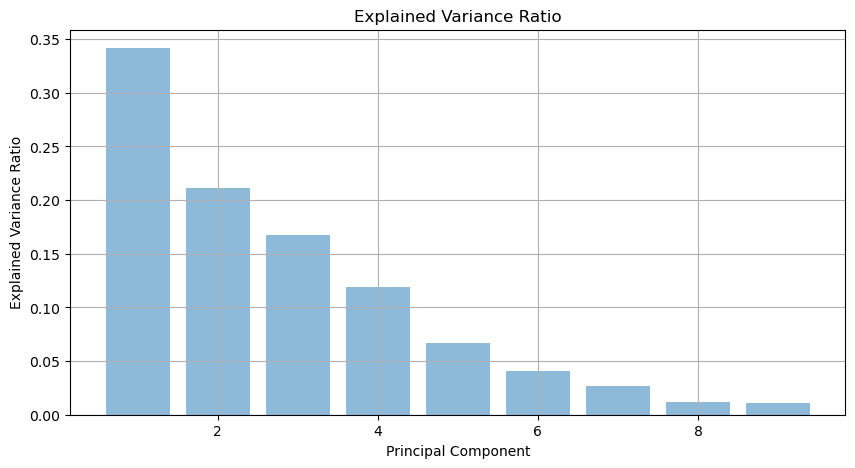

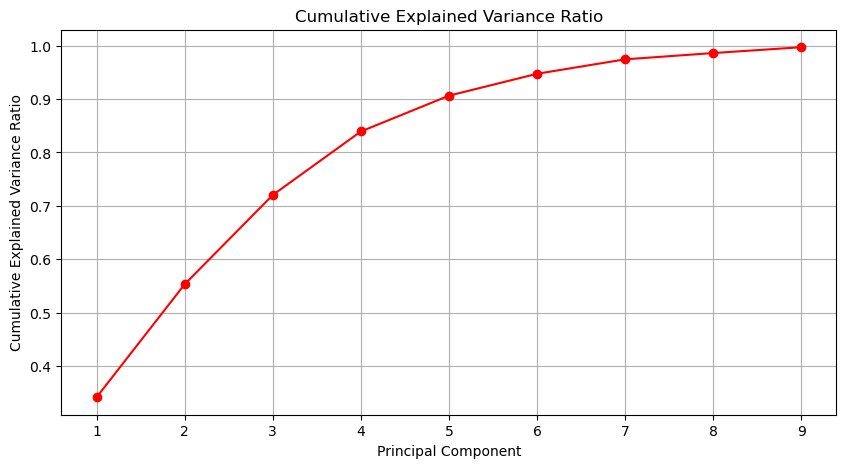

In [39]:
pca_pipeline.fit(X)

pca = pca_pipeline.named_steps['pca']

explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

# cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plotcumulative explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, color='red', marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [40]:
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the number of components needed to explain a certain threshold of variance (e.g., 99%)
n_components_threshold = np.argmax(cumulative_variance >= 0.99) + 1

print("Number of components needed to explain 99% variance:", n_components_threshold)

Number of components needed to explain 99% variance: 9


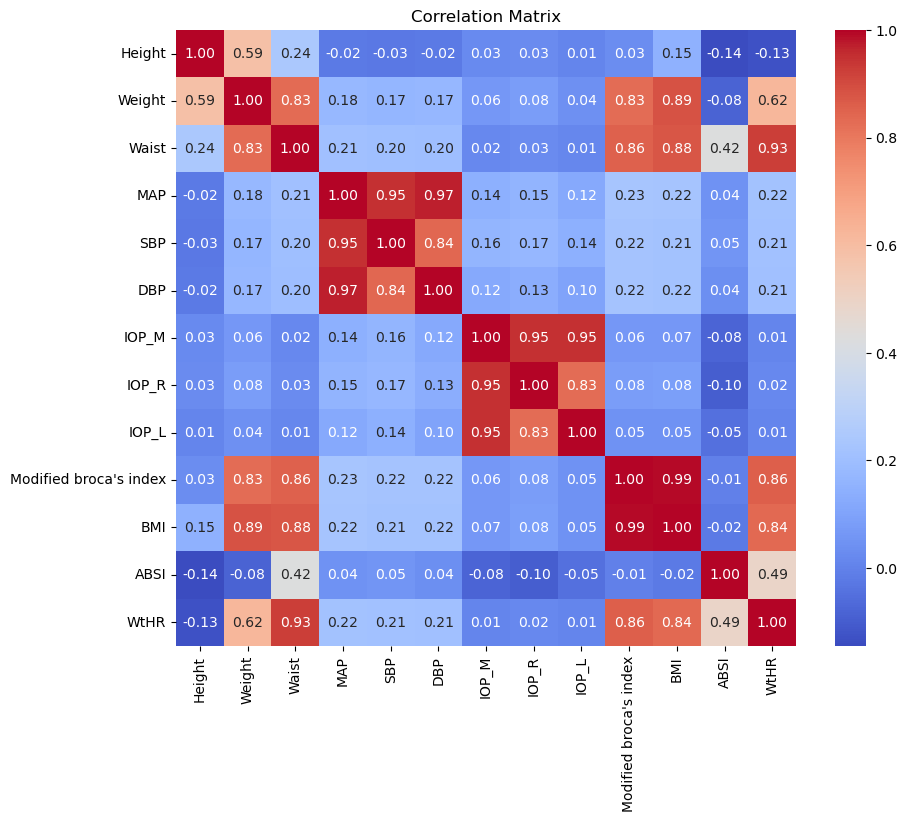

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# numeric columns
numeric_df = resampled_df_bool_age.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation_matrix = numeric_df.corr()

# plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 1. from the corr matrix, we dont see any significantly strong relationships across the features.
### Additionally, some features that exhibit medium strong relationship are in fact a companent in other features e.g.: WtHR (0.93 corr with Waist) in fact includes the Waist values in its formula; similarly with other measures. 
<br>
### which might mean that we wont need PCA
<br>

### 2. Additionally, the reduced feats only explain 34% of the variance which is not sufficient
<br>

### to test this theory, we will conduct additional step to see the Accuracy using the orginal data vs. reduced data by using simple classification techniques

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = resampled_df_bool_age.drop(columns=['Testosterone_Class'])
y = resampled_df_bool_age['Testosterone_Class']

# Define the column transformer to scale numeric features and encode categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['40s', '50s', '60s']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=96)

# Define classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),  
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC())
]

# Loop over classifiers
for name, classifier in classifiers:
    # Define the pipeline without PCA
    original_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit and evaluate the model with original data
    original_pipeline.fit(X_train, y_train)
    y_pred_original = original_pipeline.predict(X_test)
    accuracy_original = accuracy_score(y_test, y_pred_original)
    
    # Define the pipeline with PCA
    pca_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=0.99)),  # Retain 99% of the variance
        ('classifier', classifier)
    ])
    
    # Fit and evaluate the model with PCA
    pca_pipeline.fit(X_train, y_train)
    y_pred_pca = pca_pipeline.predict(X_test)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    
    # Print the results
    print(f"{name}:")
    print(f"  Original Data Accuracy: {accuracy_original:.4f}")
    print(f"  Reduced Data (PCA) Accuracy: {accuracy_pca:.4f}")

Logistic Regression:
  Original Data Accuracy: 0.7401
  Reduced Data (PCA) Accuracy: 0.5248
KNN:
  Original Data Accuracy: 0.8170
  Reduced Data (PCA) Accuracy: 0.8135
SVM:
  Original Data Accuracy: 0.8050
  Reduced Data (PCA) Accuracy: 0.7390


# Based on the above results, and the reasons previously mentioned, we will stick with the Original Data (non-reduced)

In [69]:
resampled_df_bool_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8754 entries, 0 to 8753
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Height                  8754 non-null   float64
 1   Weight                  8754 non-null   float64
 2   Waist                   8754 non-null   float64
 3   MAP                     8754 non-null   float64
 4   SBP                     8754 non-null   int64  
 5   DBP                     8754 non-null   float64
 6   IOP_M                   8754 non-null   float64
 7   IOP_R                   8754 non-null   int64  
 8   IOP_L                   8754 non-null   int64  
 9   Modified broca's index  8754 non-null   float64
 10  BMI                     8754 non-null   float64
 11  ABSI                    8754 non-null   float64
 12  WtHR                    8754 non-null   float64
 13  40s                     8754 non-null   bool   
 14  50s                     8754 non-null   

## Preparing data for our models

In [156]:
# features (X) and target variable (y)
X = resampled_df_bool_age.drop(columns=['Testosterone_Class'])
y = resampled_df_bool_age['Testosterone_Class']

# encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# define the column transformer to scale numeric features and encode categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['40s', '50s', '60s']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=96)

In [67]:
# confusion matrix measures extraction function

import numpy as np

def calculate_confusion_matrix_measures(conf_matrix, classifier):
    # Number of test examples
    num_test_examples = np.sum(conf_matrix)

    # True Positive (TP) for each class
    TP = np.diag(conf_matrix)

    # True Negative (TN) for each class
    TN = np.sum(conf_matrix) - np.sum(conf_matrix, axis=0) - np.sum(conf_matrix, axis=1) + np.diag(conf_matrix)

    # False Positive (FP) for each class
    FP = np.sum(conf_matrix, axis=1) - TP

    # False Negative (FN) for each class
    FN = np.sum(conf_matrix, axis=0) - TP

    # Correctly Classified (Sum of True)
    correctly_classified = np.sum(TP)

    # Misclassified (Sum of False)
    misclassified = np.sum(FP) + np.sum(FN)

    # Get the class names from the classifier
    class_names = classifier.classes_

    # Return the measures and class names
    return {
        "Class Names": class_names,
        "Number of Test Examples": num_test_examples,
        "True Positive": TP,
        "True Negative": TN,
        "False Positive": FP,
        "False Negative": FN,
        "Correctly Classified (Sum of True)": correctly_classified,
        "Misclassified (Sum of False)": misclassified
    }

In [55]:
### to be used with the models (except SVM)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_multiclass(model, X_test, y_test, classes, model_name="Model"):
    """
    Plot ROC curve for the given multiclass model.
    
    Parameters:
        model (object): Trained multiclass model.
        X_test (DataFrame or array-like): Test features.
        y_test (array-like): True labels for the test data.
        classes (list): List of class labels.
        model_name (str, optional): Name of the model. Default is "Model".
    """
    # Predict probabilities
    y_prob = model.predict_proba(X_test)
    
    # Initialize variables to store false positive rate, true positive rate, and AUC scores for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Calculate ROC curve and AUC score for each class
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (AUC = {:.2f}) for {}'.format(roc_auc[i], classes[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for {}'.format(model_name))
    plt.legend(loc='lower right')
    plt.show()

# 1. SVM

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

# params
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': [0.1, 1, 10],
    'classifier__degree': [2, 3, 4],  # For polynomial kernel
    'classifier__coef0': [0.0, 0.1, 1.0],  # For polynomial and sigmoid kernels
    'classifier__tol': [1e-3, 1e-4],  # Tolerance for stopping criterion
    'classifier__max_iter': [200, 500, 700]  # Maximum number of iterations
}

# pipeline initialization
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# grid search initialization
grid_SVM = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# start time
start_time = time.time()

# fit the grid
grid_SVM.fit(X_train, y_train)

# end time
end_time = time.time()

# execution time
execution_time = end_time - start_time

# best parameters and score
best_params = grid_SVM.best_params_
best_score = grid_SVM.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Execution Time:", execution_time, "seconds")

Best Parameters: {'classifier__C': 10, 'classifier__coef0': 0.0, 'classifier__degree': 2, 'classifier__gamma': 1, 'classifier__kernel': 'rbf', 'classifier__max_iter': 700, 'classifier__tol': 0.001}
Best Score: 0.9223154365456935
Execution Time: 628.8254396915436 seconds


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [160]:
import joblib

model_path = "grid_SVM.pkl"

# Save the model
joblib.dump(grid_SVM, model_path)

print("Model saved")


Model saved


In [161]:
y.unique()

array(['Normal', 'High', 'Low'], dtype=object)

In [162]:
original_labels = label_encoder.inverse_transform([0,1,2])
print(original_labels)

['High' 'Low' 'Normal']


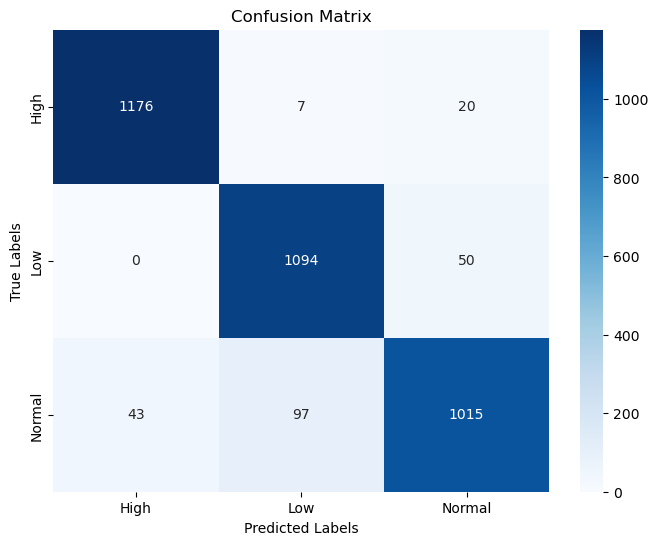

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = grid_SVM.predict(X_test)

# classes and labels
classes = ['High', 'Low', 'Normal']
labels = [0, 1, 2]

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# run function to extract conf matrix measures

measures = calculate_confusion_matrix_measures(conf_matrix, grid_SVM)
for key, value in measures.items():
    print(f"{key}: {value}")

Class Names: [0 1 2]
Number of Test Examples: 3502
True Positive: [1176 1094 1015]
True Negative: [2256 2254 2277]
False Positive: [ 27  50 140]
False Negative: [ 43 104  70]
Correctly Classified (Sum of True): 3285
Misclassified (Sum of False): 434


In [164]:
from sklearn.metrics import classification_report

best_estimator = grid_SVM.best_estimator_

y_pred = best_estimator.predict(X_test)

# classification report with class names
target_names = ['High', 'Low', 'Normal']

report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        High       0.96      0.98      0.97      1203
         Low       0.91      0.96      0.93      1144
      Normal       0.94      0.88      0.91      1155

    accuracy                           0.94      3502
   macro avg       0.94      0.94      0.94      3502
weighted avg       0.94      0.94      0.94      3502



# 2. KNN

In [ ]:
'classifier__n_neighbors': [3, 5, 7],
'classifier__weights': ['uniform', 'distance'],
'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
'classifier__leaf_size': [20, 30, 40],
'classifier__p': [1, 2]

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# params
param_grid = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__leaf_size': [20, 30, 40],
    'classifier__p': [1, 2],  # L1 and L2 norms
}


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Initialize the grid search
grid_KNN = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Track the start time
start_time = time.time()

# Fit the grid search
grid_KNN.fit(X_train, y_train)

# Track the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Get the best parameters and score
best_params = grid_KNN.best_params_
best_score = grid_KNN.best_score_

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Execution Time:", execution_time, "seconds")

Best Parameters: {'classifier__algorithm': 'auto', 'classifier__leaf_size': 20, 'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best Score: 0.8503435277060396
Execution Time: 106.2265784740448 seconds


In [86]:
import joblib

model_path = "grid_KNN.pkl"

joblib.dump(grid_KNN, model_path)

print("Model saved")

Model saved


In [157]:
import joblib

model_path = "grid_KNN.pkl"

# Load model
grid_KNN = joblib.load(model_path)


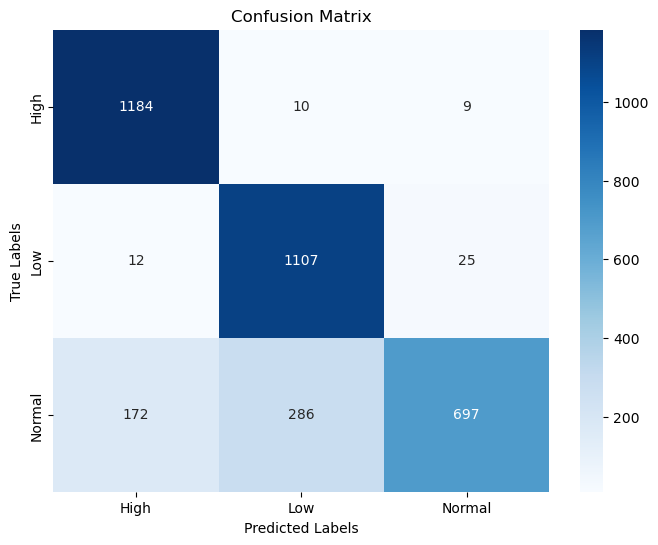

In [158]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = grid_KNN.predict(X_test)

# defining the classes and labels
classes = ['High', 'Low', 'Normal']
labels = [0, 1, 2]

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [81]:
# run function to extract conf matrix measures

measures = calculate_confusion_matrix_measures(conf_matrix, grid_KNN)
for key, value in measures.items():
    print(f"{key}: {value}")

Class Names: [0 1 2]
Number of Test Examples: 3502
True Positive: [1184 1107  697]
True Negative: [2115 2062 2313]
False Positive: [ 19  37 458]
False Negative: [184 296  34]
Correctly Classified (Sum of True): 2988
Misclassified (Sum of False): 1028


In [159]:
from sklearn.metrics import classification_report

# best estimator from the grid search
best_estimator = grid_KNN.best_estimator_

# make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# generate the classification report
target_names = ['High', 'Low', 'Normal']

# Generate classification report with class names
report = classification_report(y_test, y_pred, target_names=target_names)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        High       0.87      0.98      0.92      1203
         Low       0.79      0.97      0.87      1144
      Normal       0.95      0.60      0.74      1155

    accuracy                           0.85      3502
   macro avg       0.87      0.85      0.84      3502
weighted avg       0.87      0.85      0.84      3502



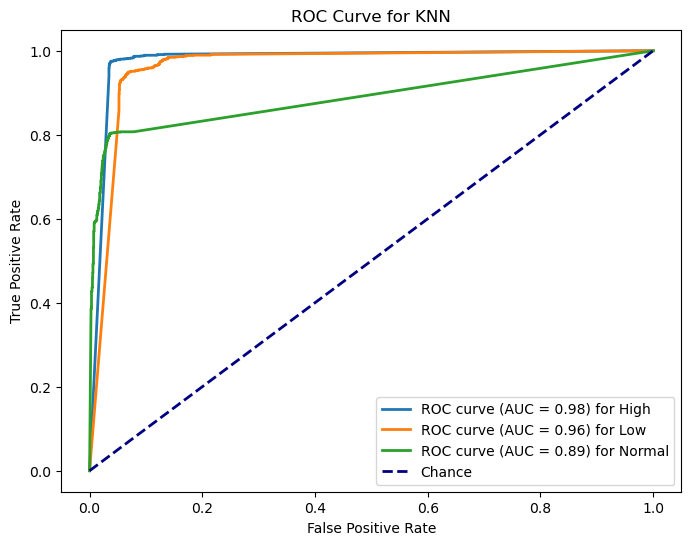

In [87]:
# ROC for KNN:
plot_roc_multiclass(grid_KNN, X_test, y_test, classes=['High', 'Low', 'Normal'], model_name="KNN")

# 3. Ensembles
# i. Random Forest
# ii. LightGBM
# iii. XGBoost
# iv. CatBoost

# 3.i. Random Forest

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Define the parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]  # Only include valid values
}

# Initialize the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Initialize the grid search
grid_RF = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')

try:
    # Track the start time
    start_time = time.time()

    # Fit the grid search
    grid_RF.fit(X_train, y_train)

    # Track the end time
    end_time = time.time()

    # Calculate the execution time
    execution_time = end_time - start_time

    # Get the best parameters and score
    best_params = grid_RF.best_params_
    best_score = grid_RF.best_score_

    # Print the best parameters and score
    print("Best Parameters:", best_params)
    print("Best Score:", best_score)
    print("Execution Time:", execution_time, "seconds")

except Exception as e:
    print("An error occurred during grid search:", e)

Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Score: 0.9232670925649042
Execution Time: 2501.6428287029266 seconds


In [166]:
import joblib

# Define the file path to save the model
model_path = "grid_RF.pkl"

# Save the model
joblib.dump(grid_RF, model_path)

print("Model saved")


Model saved


In [160]:
import joblib

# Define the file path from where to load the model
model_path = "grid_RF.pkl"

# Load the model
grid_RF = joblib.load(model_path)


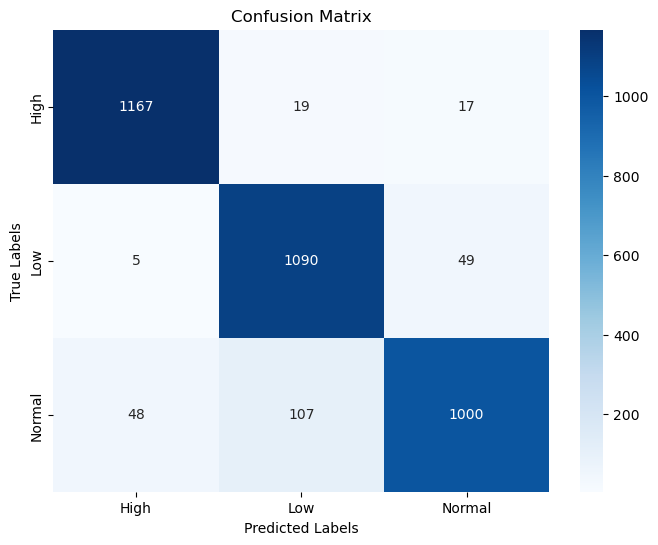

In [161]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a trained model named grid_KNN
# You can get the predicted labels using the model
y_pred = grid_RF.predict(X_test)

# Define the classes and labels
classes = ['High', 'Low', 'Normal']
labels = [0, 1, 2]

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [100]:
# run function to extract conf matrix measures

measures = calculate_confusion_matrix_measures(conf_matrix, grid_RF)
for key, value in measures.items():
    print(f"{key}: {value}")

Class Names: [0 1 2]
Number of Test Examples: 3502
True Positive: [1167 1090 1000]
True Negative: [2246 2232 2281]
False Positive: [ 36  54 155]
False Negative: [ 53 126  66]
Correctly Classified (Sum of True): 3257
Misclassified (Sum of False): 490


In [162]:
from sklearn.metrics import classification_report

# getting the best estimator from the grid search
best_estimator = grid_RF.best_estimator_

# making predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# generating the classification report
target_names = ['High', 'Low', 'Normal']

# generating classification report with class names
report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        High       0.96      0.97      0.96      1203
         Low       0.90      0.95      0.92      1144
      Normal       0.94      0.87      0.90      1155

    accuracy                           0.93      3502
   macro avg       0.93      0.93      0.93      3502
weighted avg       0.93      0.93      0.93      3502



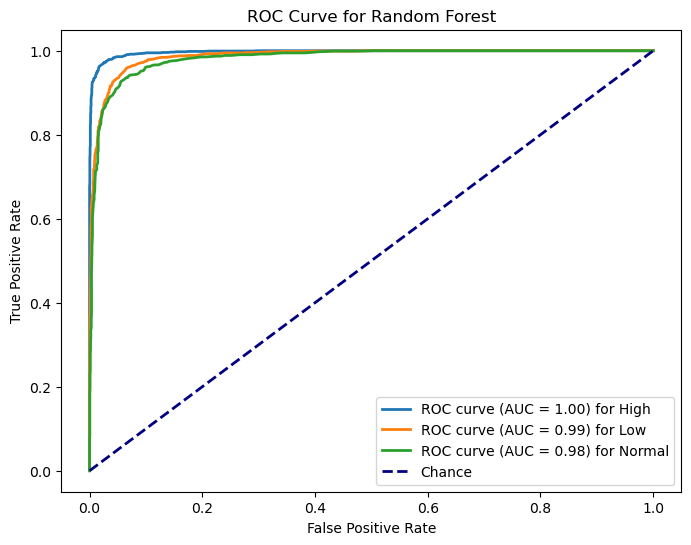

In [145]:
# ROC for RF:
plot_roc_multiclass(grid_RF, X_test, y_test, classes=['High', 'Low', 'Normal'], model_name="Random Forest")

# 3.ii. LightGBM

In [115]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import time

# Define the parameter grid for LightGBM
param_grid = {
    'classifier__n_estimators': [10, 20, 50],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
#    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__reg_alpha': [0.0, 0.1, 0.5],
#    'classifier__min_child_samples': [5, 7, 10],
    'classifier__num_leaves': [5, 10, 15]  

}

# Initialize the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(force_row_wise=True, random_state=96))
])

# Initialize the grid search
grid_LGBM = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Track the start time
start_time = time.time()

# Fit the grid search
grid_LGBM.fit(X_train, y_train)

# Track the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Get the best parameters and score
best_params = grid_LGBM.best_params_
best_score = grid_LGBM.best_score_

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Execution Time:", execution_time, "seconds")

[LightGBM] [Info] Total Bins 2691
[LightGBM] [Info] Number of data points in the train set: 5252, number of used features: 19
[LightGBM] [Info] Start training from score -1.119196
[LightGBM] [Info] Start training from score -1.085372
[LightGBM] [Info] Start training from score -1.091592
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 50, 'classifier__num_leaves': 15, 'classifier__reg_alpha': 0.0}
Best Score: 0.8979442707625391
Execution Time: 170.30691862106323 seconds


In [117]:
import joblib

# Define the file path to save the LightGBM model
model_path = "grid_LGBM.pkl"

# Save the LightGBM model
joblib.dump(grid_LGBM, model_path)

print("LightGBM model saved")

LightGBM model saved


In [163]:
import joblib

# Define the file path from where to load the model
model_path = "grid_LGBM.pkl"

# Load the model
grid_LGBM = joblib.load(model_path)


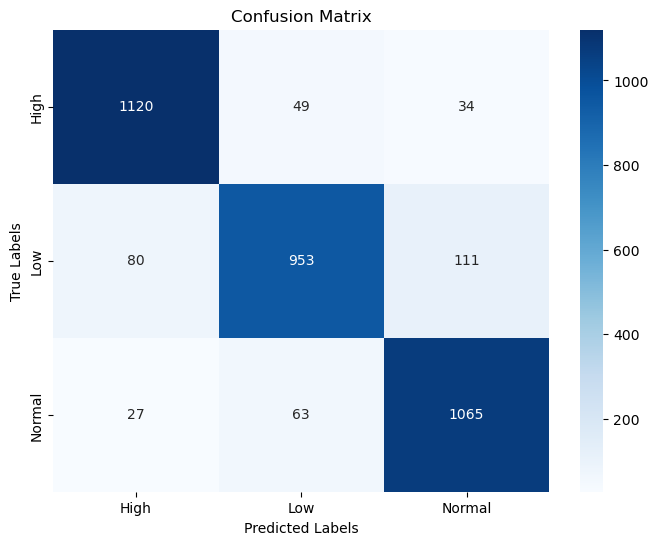

In [164]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a trained model named grid_KNN
# You can get the predicted labels using the model
y_pred = grid_LGBM.predict(X_test)

# Define the classes and labels
classes = ['High', 'Low', 'Normal']
labels = [0, 1, 2]

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [108]:
# run function to extract conf matrix measures

measures = calculate_confusion_matrix_measures(conf_matrix, grid_LGBM)
for key, value in measures.items():
    print(f"{key}: {value}")

Class Names: [0 1 2]
Number of Test Examples: 3502
True Positive: [1120  953 1065]
True Negative: [2192 2246 2202]
False Positive: [ 83 191  90]
False Negative: [107 112 145]
Correctly Classified (Sum of True): 3138
Misclassified (Sum of False): 728


In [109]:
from sklearn.metrics import classification_report

# getting the best estimator from the grid search
best_estimator = grid_LGBM.best_estimator_

# making predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# generating the classification report
target_names = ['High', 'Low', 'Normal']

# generating classification report with class names
report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        High       0.91      0.93      0.92      1203
         Low       0.89      0.83      0.86      1144
      Normal       0.88      0.92      0.90      1155

    accuracy                           0.90      3502
   macro avg       0.90      0.90      0.90      3502
weighted avg       0.90      0.90      0.90      3502



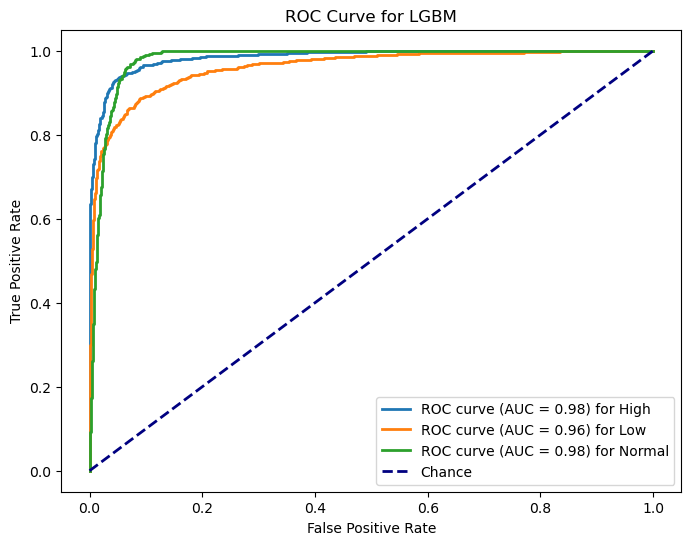

In [110]:
# ROC for LGBM:
plot_roc_multiclass(grid_LGBM, X_test, y_test, classes=['High', 'Low', 'Normal'], model_name="LGBM")

# 3.iii. XGBoost

In [123]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import time

# Define the parameter grid for XGBoost
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__reg_alpha': [0.0, 0.1, 0.5],
    'classifier__reg_lambda': [0.0, 0.1, 0.5],
#    'classifier__subsample': [0.6, 0.8, 1.0],
#    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=96))
])

# Initialize the grid search
grid_XGBoost = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Track the start time
start_time = time.time()

# Fit the grid search
grid_XGBoost.fit(X_train, y_train)

# Track the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Get the best parameters and score
best_params = grid_XGBoost.best_params_
best_score = grid_XGBoost.best_score_

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Execution Time:", execution_time, "seconds")


Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__reg_alpha': 0.1, 'classifier__reg_lambda': 0.1}
Best Score: 0.9514481446241675
Execution Time: 1089.6778042316437 seconds


In [124]:
import joblib

# Define the file path to save the LightGBM model
model_path = "grid_XGBoost.pkl"

# Save the LightGBM model
joblib.dump(grid_XGBoost, model_path)

print("grid_XGBoost model saved")

grid_XGBoost model saved


In [165]:
import joblib

# Define the file path from where to load the model
model_path = "grid_XGBoost.pkl"

# Load the model
grid_XGBoost = joblib.load(model_path)


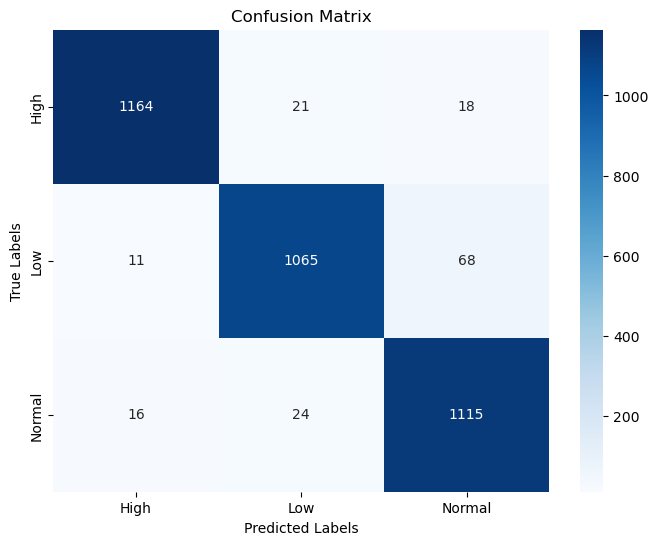

In [166]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# You can get the predicted labels using the model
y_pred = grid_XGBoost.predict(X_test)

# Define the classes and labels
classes = ['High', 'Low', 'Normal']
labels = [0, 1, 2]

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [118]:
# run function to extract conf matrix measures

measures = calculate_confusion_matrix_measures(conf_matrix, grid_XGBoost)
for key, value in measures.items():
    print(f"{key}: {value}")

Class Names: [0 1 2]
Number of Test Examples: 3502
True Positive: [1164 1065 1115]
True Negative: [2272 2313 2261]
False Positive: [39 79 40]
False Negative: [27 45 86]
Correctly Classified (Sum of True): 3344
Misclassified (Sum of False): 316


In [167]:
from sklearn.metrics import classification_report

# getting the best estimator from the grid search
best_estimator = grid_XGBoost.best_estimator_

# making predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# generating the classification report
target_names = ['High', 'Low', 'Normal']

# generating classification report with class names
report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.97      0.97      1203
         Low       0.96      0.93      0.94      1144
      Normal       0.93      0.97      0.95      1155

    accuracy                           0.95      3502
   macro avg       0.96      0.95      0.95      3502
weighted avg       0.96      0.95      0.95      3502



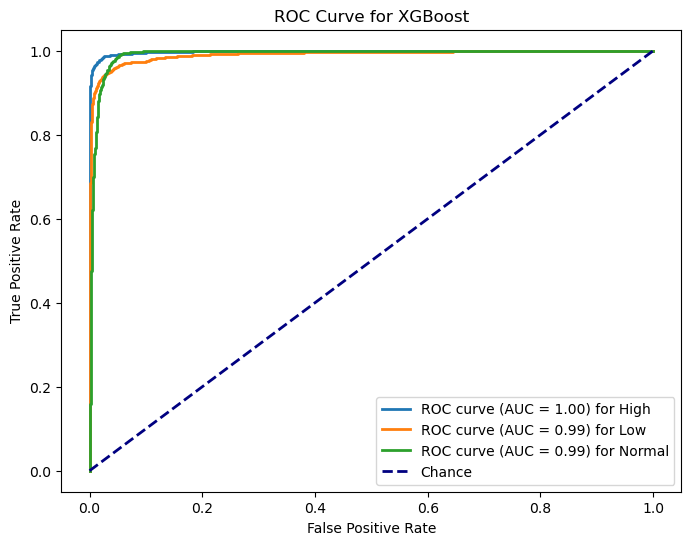

In [119]:
# ROC for grid_XGBoost:
plot_roc_multiclass(grid_XGBoost, X_test, y_test, classes=['High', 'Low', 'Normal'], model_name="XGBoost")

# 3.iv. CatBoost
<br>

### Special notice: CatBoost's specialty is that is takes categorical data as target

In [168]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import time


# Separate features (X) and target variable (y)
X = resampled_df_bool_age.drop(columns=['Testosterone_Class'])
y = resampled_df_bool_age['Testosterone_Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=96)

In [128]:



# Define the parameter grid for CatBoost
param_grid = {
    'classifier__iterations': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__depth': [3, 5, 7],
    'classifier__l2_leaf_reg': [1, 3, 5],
}

# Initialize the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(random_state=96, verbose=0))
])

# Initialize the grid search
grid_CatBoost = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Track the start time
start_time = time.time()

# Fit the grid search
grid_CatBoost.fit(X_train, y_train)

# Track the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Get the best parameters and score
best_params = grid_CatBoost.best_params_
best_score = grid_CatBoost.best_score_

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Execution Time:", execution_time, "seconds")

Best Parameters: {'classifier__depth': 7, 'classifier__iterations': 200, 'classifier__l2_leaf_reg': 1, 'classifier__learning_rate': 0.1}
Best Score: 0.9306934891939649
Execution Time: 891.3038718700409 seconds


In [129]:
import joblib

# Define the file path to save the LightGBM model
model_path = "grid_CatBoost.pkl"

# Save the LightGBM model
joblib.dump(grid_CatBoost, model_path)

print("grid_CatBoost model saved")

grid_CatBoost model saved


In [169]:
import joblib

# Define the file path from where to load the model
model_path = "grid_CatBoost.pkl"

# Load the model
grid_CatBoost = joblib.load(model_path)


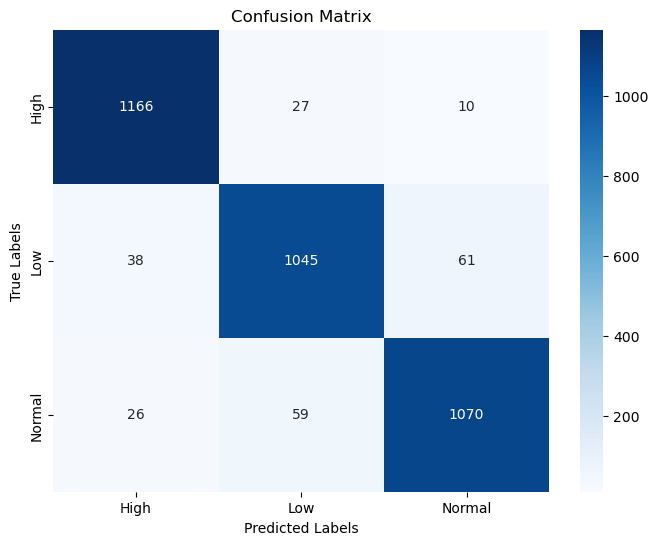

In [170]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# You can get the predicted labels using the model
y_pred = grid_CatBoost.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid_CatBoost.classes_, yticklabels=grid_CatBoost.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [129]:
# run function to extract conf matrix measures

measures = calculate_confusion_matrix_measures(conf_matrix, grid_CatBoost)
for key, value in measures.items():
    print(f"{key}: {value}")

Class Names: ['High' 'Low' 'Normal']
Number of Test Examples: 3502
True Positive: [1166 1045 1070]
True Negative: [2235 2272 2276]
False Positive: [37 99 85]
False Negative: [64 86 71]
Correctly Classified (Sum of True): 3281
Misclassified (Sum of False): 442


In [126]:
from sklearn.metrics import classification_report

# getting the best estimator from the grid search
best_estimator = grid_CatBoost.best_estimator_

# making predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# generating the classification report
target_names = ['High', 'Low', 'Normal']

# generating classification report with class names
report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        High       0.95      0.97      0.96      1203
         Low       0.92      0.91      0.92      1144
      Normal       0.94      0.93      0.93      1155

    accuracy                           0.94      3502
   macro avg       0.94      0.94      0.94      3502
weighted avg       0.94      0.94      0.94      3502



In [171]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_multiclass_CATBOOST(model, X_test, y_test, classes, model_name="Model"):
    """
    Plot ROC curve for the given multiclass model.
    
    Parameters:
        model (object): Trained multiclass model.
        X_test (DataFrame or array-like): Test features.
        y_test (array-like): True labels for the test data.
        classes (list): List of class labels.
        model_name (str, optional): Name of the model. Default is "Model".
    """
    # Predict probabilities
    y_prob = model.predict_proba(X_test)
    
    # Initialize variables to store false positive rate, true positive rate, and AUC scores for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Convert class labels to integers
    label_dict = {label: i for i, label in enumerate(classes)}
    y_test_int = np.vectorize(label_dict.get)(y_test)
    
    # Calculate ROC curve and AUC score for each class
    for i, label in enumerate(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_int == i, y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(classes):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (AUC = {:.2f}) for {}'.format(roc_auc[i], label))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for {}'.format(model_name))
    plt.legend(loc='lower right')
    plt.show()

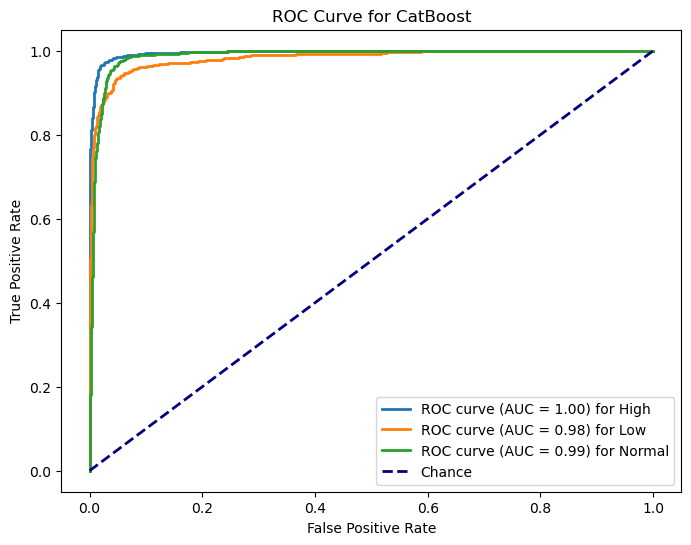

In [172]:
# ROC for grid_CatBoost:
plot_roc_multiclass_CATBOOST(grid_CatBoost, X_test, y_test, classes=['High', 'Low', 'Normal'], model_name="CatBoost")

In [134]:
os.listdir()

['.ipynb_checkpoints',
 'catboost_info',
 'Cross_Sectional_Study_among_Intraocular_Pressure_M.pdf',
 'grid_CatBoost.pkl',
 'grid_KNN.pkl',
 'grid_LGBM.pkl',
 'grid_RF.joblib',
 'grid_RF.pkl',
 'grid_SVM.pkl',
 'grid_XGBoost.pkl',
 'mean serum TT levels that i used for the cw.png',
 'ML CW.ipynb',
 'Sample_1.docx',
 'Sample_1.pdf',
 'serum TT (40s to 70s).gif',
 'TESTING FOR CW - DATA 2 - 7072CEM .ipynb',
 'testosterone_trimmed_data.xlsx']

# Voting Classifier

In [175]:
# Separate features (X) and target variable (y)
X = resampled_df_bool_age.drop(columns=['Testosterone_Class'])
y = resampled_df_bool_age['Testosterone_Class']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define the column transformer to scale numeric features and encode categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['40s', '50s', '60s']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=96)

In [170]:
from sklearn.ensemble import VotingClassifier
import time

# Start the timer
start_time = time.time()

# Define the estimators
estimators = [("RF", grid_RF), ("KNN", grid_KNN), ("LightGBM", grid_LGBM), ("SVM", grid_SVM), ("XGBoost", grid_XGBoost)]
voting_clf1 = VotingClassifier(estimators=estimators, voting="hard")

# Fit the model
voting_clf1 = voting_clf1.fit(X_train, y_train)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the time taken
print("Time taken: {:.2f} seconds".format(elapsed_time))

# Print the accuracy
print("Voter's accuracy: %.2f%%" % (100*voting_clf1.score(X_test, y_test)))

[LightGBM] [Info] Total Bins 2691
[LightGBM] [Info] Number of data points in the train set: 5252, number of used features: 19
[LightGBM] [Info] Start training from score -1.119196
[LightGBM] [Info] Start training from score -1.085372
[LightGBM] [Info] Start training from score -1.091592


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Time taken: 11186.65 seconds
Voter's accuracy: 95.40%


In [ ]:
# Time taken: 7581.42 seconds
# Voter's accuracy: 94.97%

In [174]:
# Save the voting_clf1
model_path = "voting_classifier.pkl"
joblib.dump(voting_clf1, model_path)
print("voting_classifier Model saved")

voting_classifier Model saved


In [176]:
import joblib

# Define the file path from where to load the model
model_path = "voting_classifier.pkl"

# Load the model
voting_clf1 = joblib.load(model_path)


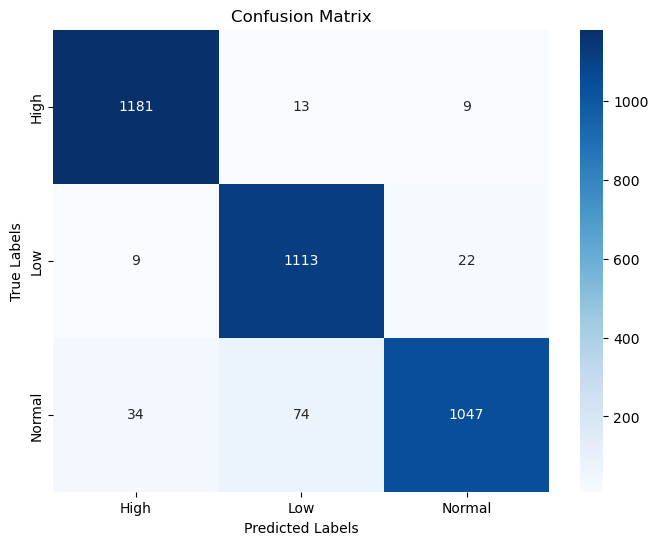

In [177]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# You can get the predicted labels using the model
y_pred = voting_clf1.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid_CatBoost.classes_, yticklabels=grid_CatBoost.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [135]:
# run function to extract conf matrix measures

measures = calculate_confusion_matrix_measures(conf_matrix, voting_clf1)
for key, value in measures.items():
    print(f"{key}: {value}")

Class Names: [0 1 2]
Number of Test Examples: 3502
True Positive: [1181 1113 1047]
True Negative: [2256 2271 2316]
False Positive: [ 22  31 108]
False Negative: [43 87 31]
Correctly Classified (Sum of True): 3341
Misclassified (Sum of False): 322


In [178]:
from sklearn.metrics import classification_report


# making predictions on the test set using the best estimator
y_pred = voting_clf1.predict(X_test)

# generating classification report
target_names = ['High', 'Low', 'Normal']

# generating classification report with class names
report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        High       0.96      0.98      0.97      1203
         Low       0.93      0.97      0.95      1144
      Normal       0.97      0.91      0.94      1155

    accuracy                           0.95      3502
   macro avg       0.95      0.95      0.95      3502
weighted avg       0.95      0.95      0.95      3502



### No ROC Curve when voting selected is 'hard'